# Lab 7

### Decision Tree

| Age | Experience | Rank | Nationality | Go  |
|-----|------------|------|-------------|-----|
| 36  | 10         | 9    | UK          | NO  |
| 42  | 12         | 4    | USA         | NO  |
| 23  | 4          | 6    | N           | NO  |
| 52  | 4          | 4    | USA         | NO  |
| 43  | 21         | 8    | USA         | YES |
| 44  | 14         | 5    | UK          | NO  |
| 66  | 3          | 7    | N           | YES |
| 35  | 14         | 9    | UK          | YES |
| 52  | 13         | 7    | N           | YES |
| 35  | 5          | 9    | N           | YES |
| 24  | 3          | 5    | USA         | NO  |
| 18  | 3          | 7    | UK          | YES |
| 45  | 9          | 9    | UK          | YES |

In [1]:
import pandas
df = pandas.read_csv('./data.csv')
print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [2]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)
print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [3]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y) 

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [ ]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pandas.read_csv("data.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

# ангилагчаа зарлан dtree хувьсагчид оноох,
# сургалтыг хийх код энд бичнэ үү

tree.plot_tree(dtree, feature_names=features) 


Information Gain Computation in Python

Энэхүү заавар нь мэдээлэлд суурилсан машин сургалтын NumPy болон Pandas модулиудыг ашиглан Python дээр бохирдол болон мэдээллийн gain хэрхэн тооцоолохыг харуулсан. Дараах 2 индексийг нарийвчлан авч үзье.

    Entropy
    Gini index

Ургамлын сан ашиглан энгийн жишээ авч үзье.


Зугаалгаар явж байгаад сагстай амттай жимс бэлдэж байна гэж бодъё.

In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

In [6]:
lst = ['apple']*3 + ['orange']*2 + ['banana']*3
fruits = pd.Series(lst)
print(fruits)

0     apple
1     apple
2     apple
3    orange
4    orange
5    banana
6    banana
7    banana
dtype: object


Энд сагсанд байгаа жимс бүрийн харьцангуй давтамжийг жимсний магадлалын хуваарилалт гэж үзэж болно.

In [7]:
probs = fruits.value_counts(normalize=True)
probs

apple     0.375
banana    0.375
orange    0.250
dtype: float64

Магадлалын тархалтыг өөрөө дараах байдлаар тодорхойлж болно.

In [8]:
probs_by_hand = [3/8, 2/8, 3/8]
print(probs_by_hand)

[0.375, 0.25, 0.375]


entropy нь дараах байдлаар тодорхойлно

$H(x)=-\sum_{i=1}^{n}P(t=n)*log_{2}(P(t=i))$

Энтропийн санаа бол шинж чанар нь, цэвэр бус байх тусам энтропи өндөр байдаг. Эсрэгээр, цэвэр шинж чанартай байх тусам энтропи бага байна.

Дараах тооцоо нь энэ жимсний сагсны хольцыг энтропийн шалгуурыг ашиглан хэрхэн тооцоолохыг харуулна.

In [9]:
entropy = -1 * np.sum(np.log2(probs) * probs)
entropy

1.561278124459133

GINI хольцын индексийг дараах байдлаар тодорхойлно.

$Gini(x)=1 - \sum_{i=1}^{n}P(t=n)^2$

GINI индексийн санаа нь энтропитэй адил бөгөөд шинж чанар нь илүү олон төрлийн бус, цэвэр бус байх тусам GINI индекс өндөр байдаг.

Жини индексийн сайн шинж чанар нь үргэлж 0-ээс 1-ийн хооронд байдаг бөгөөд энэ нь GINI индексийг өөр өөр шинж чанаруудаар харьцуулахад хялбар болгодог.

GINI индексийг ашиглан өмнөх жимсний сагсны бохирдлыг дараах байдлаар тооцно.

In [10]:
gini_index = 1 - np.sum(np.square(probs))
gini_index

0.65625

In [11]:
lst2 = ['apple', 'orange', 'banana', 'mango', 'blueberry', 'watermelon', 'pear']
fruits2 = pd.Series(lst2)
print(fruits2)
probs2 = fruits2.value_counts(normalize=True)
probs2

0         apple
1        orange
2        banana
3         mango
4     blueberry
5    watermelon
6          pear
dtype: object


apple         0.142857
orange        0.142857
banana        0.142857
mango         0.142857
blueberry     0.142857
watermelon    0.142857
pear          0.142857
dtype: float64

In [12]:
entropy = -1 * np.sum(np.log2(probs2) * probs2)
entropy

2.807354922057604

In [13]:
gini_index = 1 - np.sum(np.square(probs2))
gini_index

0.8571428571428572

Тооцоолж байсанчлин хоёр дахь жимсний сагсны энтропи болон GINI индекс хоёулаа эхний жимсний сагсныхаас өндөр байна.

### Жимсний жишээ

Одоо бид бодит Ургамлын өгөгдлийн багцын хольцын тооцооны дэлгэрэнгүйг боловсруулж байна.

Эхлээд датасетийг Cloud-аас импортолъё.

In [14]:
import pandas as pd
import io
import requests

url_name = 'https://raw.githubusercontent.com/akmand/datasets/master/FMLPDA_Table4_3.csv'
url_content = requests.get(url_name, verify=False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
df

,stream,slope,elevation,vegetation
0,False,steep,high,chapparal
1,True,moderate,low,riparian
2,True,steep,medium,riparian
3,False,steep,medium,chapparal
4,False,flat,high,conifer
5,True,steep,highest,conifer
6,True,steep,high,chapparal


Тохиромжтой болгох үүднээс бид энтропи эсвэл жини индексийг ашиглан шинж чанарын хольцыг тооцдог compute_impurity() хэмээх функцийг тодорхойлъё.

In [15]:
def compute_impurity(feature, impurity_criterion):
    """
    Энэ функц нь шинж чанарын бохирдлыг тооцдог. индекс: "энтропи", "gini"
    оролт: онцлог (энэ нь Pandas цуврал байх шаардлагатай)
    гаралт: онцлог хольц
    """
    # энд магадлалыг тооцоолох илэрхийлэл бичнэ үү 
    
    if impurity_criterion == 'entropy':
        pass
        # энд энтропи тооцоолох илэрхийлэлийг бичнэ үү
    elif impurity_criterion == 'gini':
        pass
        # энд gini тооцоолох илэрхийлэлийг бичнэ үү
    else:
        raise ValueError('Unknown impurity criterion')
        
    # энд тооцоолсон утгыг таслалаас хойш 3 оронгын нарийвчлалтай буцаах код бичнэ үү

print('impurity using entropy:', compute_impurity(fruits, 'entropy'))
print('impurity using gini index:', compute_impurity(fruits, 'gini'))

impurity using entropy: None
impurity using gini index: None


### Decision Tree Titanic dataset

https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [16]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# Loading the data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Store our test passenger IDs for easy access
PassengerId = test['PassengerId']

# Showing overview of the train dataset
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
# Copy original dataset in case we need it later when digging into interesting features
# WARNING: Beware of actually copying the dataframe instead of just referencing it
# "original_train = train" will create a reference to the train variable (changes in 'train' will apply to 'original_train')
original_train = train.copy() # Using 'copy()' allows to clone the dataset, creating a different object with the same values

# Feature engineering steps taken from Sina and Anisotropic, with minor changes to avoid warnings
full_data = [train, test]

# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;

In [18]:

# Feature selection: remove variables no longer containing relevant information
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [19]:
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

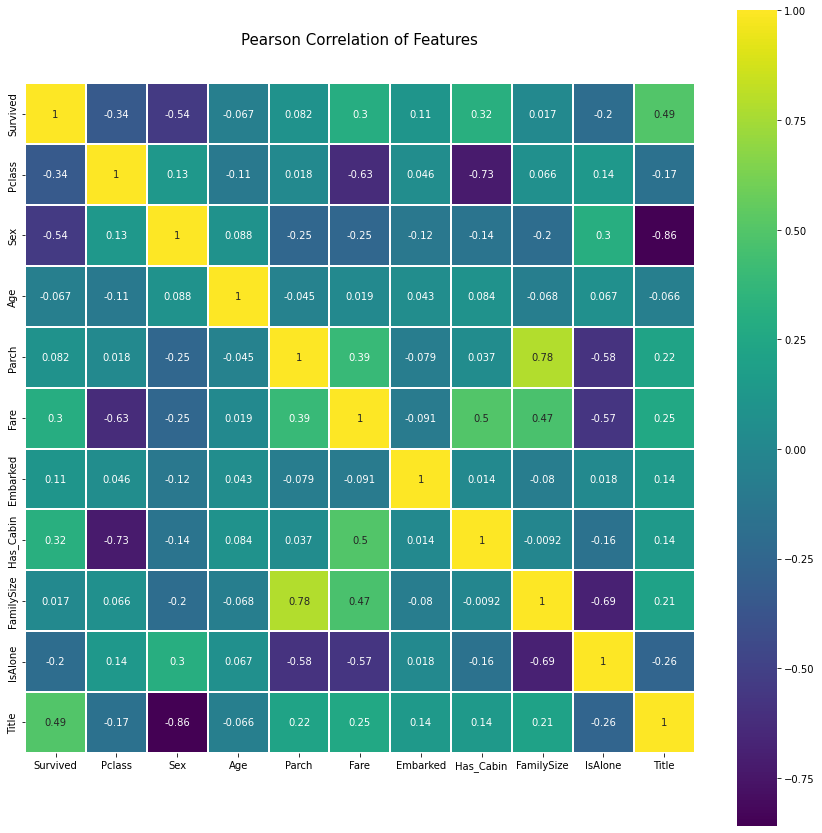

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [21]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.782285
         2          0.799189
         3          0.828277
         4          0.819288
         5          0.818202
         6          0.804769
         7          0.804732
         8          0.805880
         9          0.818227
        10          0.810375


[Text(0.5, 0.875, 'X[9] <= 1.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.625, 'X[6] <= 0.5\ngini = 0.264\nsamples = 517\nvalue = [436, 81]'),
 Text(0.125, 0.375, 'X[0] <= 1.5\ngini = 0.197\nsamples = 424\nvalue = [377, 47]'),
 Text(0.0625, 0.125, 'gini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.1875, 0.125, 'gini = 0.187\nsamples = 402\nvalue = [360, 42]'),
 Text(0.375, 0.375, 'X[4] <= 0.5\ngini = 0.464\nsamples = 93\nvalue = [59, 34]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.4375, 0.125, 'gini = 0.48\nsamples = 85\nvalue = [51, 34]'),
 Text(0.75, 0.625, 'X[7] <= 4.5\ngini = 0.422\nsamples = 374\nvalue = [113, 261]'),
 Text(0.625, 0.375, 'X[0] <= 2.5\ngini = 0.346\nsamples = 323\nvalue = [72, 251]'),
 Text(0.5625, 0.125, 'gini = 0.215\nsamples = 196\nvalue = [24, 172]'),
 Text(0.6875, 0.125, 'gini = 0.47\nsamples = 127\nvalue = [48, 79]'),
 Text(0.875, 0.375, 'X[0] <= 2.5\ngini = 0.315\nsamples = 51\nvalue = [41, 10]'),
 

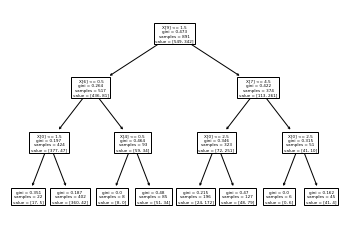

In [22]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1).values 
x_test = test.values

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
tree.plot_tree(decision_tree) 


In [23]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

82.38

In [24]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
from sklearn import preprocessing
# x = x_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_train)

In [26]:
print(x_scaled[:1], x_scaled.shape, y_train[:5], y_train.shape)

[[1.     1.     0.0125 0.     0.     0.     0.     0.1    0.     0.    ]] (891, 10) 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64 (891,)


In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 270)
        self.fc2 = nn.Linear(270,270)
        self.fc3 = nn.Linear(270, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        
        return x
    
net = Net()

In [93]:
from torch.utils.data import TensorDataset, DataLoader
batch_size = 128
num_epochs = 30
learning_rate = 0.001
tensor_x = torch.Tensor(x_scaled) # transform to torch tensor
tensor_y = torch.Tensor(y_train)
my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset, batch_size=batch_size) # create your dataloader

In [94]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [103]:
from importlib.metadata import requires
from sklearn.utils import shuffle
from torch.autograd import Variable

for epoch in range(num_epochs):
    losses = 0
    train_acc = 0
    for x, y in my_dataloader:
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        x_var = Variable(x,requires_grad=True)
        y_var = Variable(y.to(torch.int64))
        ypred_var = net(x_var.to(torch.float32))
        y_var = torch.nn.functional.one_hot(y_var, 2) 
        loss = criterion(ypred_var, y_var.to(torch.float32))
        losses += loss
        loss.backward()
        optimizer.step()
        train_acc += torch.sum(ypred_var.argmax(dim=1) == y)
    if epoch%10 == 0:
        print(losses, train_acc/x_scaled.shape[0])

tensor(3.0950, grad_fn=<AddBackward0>) tensor(0.8833)
tensor(3.0650, grad_fn=<AddBackward0>) tensor(0.8799)
tensor(3.0725, grad_fn=<AddBackward0>) tensor(0.8721)
